In [9]:
# IMPORTANT: No files have been uploaded to the Colab Jupyter server, so this 
# notebook should for now be treated as a readonly. Changes from the original
# project have been properly indicated

import time
import warnings

import numpy as np
# Pandas included for local environments
import pandas as pd
import matplotlib.pyplot as plt
# Basic matplotlib import for custom axis
from matplotlib.ticker import FixedLocator, FixedFormatter

import sklearn.model_selection as cv

from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    BaggingClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    VotingClassifier,
)

from sklearn.naive_bayes import GaussianNB
from statsmodels.stats.contingency_tables import mcnemar

%matplotlib inline

In [5]:
# Define a function decorator to measure its execution time.
def compute_executions_time(function):
    def wrapper():
        start_time = time.time()  # init measuring time
        function()  # execute function
        print(f"\n{time.time() - start_time} seconds")  # print execution time
    return wrapper

In [6]:
# Deprecated csv import, useful only on local environments
df = pd.read_csv("cancerpatientdatasets.csv")

df = df.drop('index', axis=1)
df = df.drop('Patient Id', axis=1)

# Updated csv import
# df = pd.read_csv('/content/cancer_preprocesado.csv')

In [7]:
# Load dataset
X = df.values[:, :-1]
y = df.values[:,-1]
print(X.shape)
print(y.shape)

(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size = .2, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1000, 23)
(1000,)
(800, 23)
(200, 23)
(800,)
(200,)


Random forest

In [179]:
lrf = []
for n_trees in [1, 2, 5, 10, 20, 50, 100, 200]:
        random_forest_classifier = RandomForestClassifier(
            n_estimators = n_trees,
            max_depth=3
        )
        scores = cross_val_score(
            estimator = random_forest_classifier,
            X = X,
            y = y,
            cv=10,
            scoring="accuracy"
        )
        print(f"Accuracy: {scores.mean():.3f} [nº estimators (trees): {n_trees}]")
        lrf.append(scores.mean())

Accuracy: 0.881 [nº estimators (trees): 1]
Accuracy: 0.949 [nº estimators (trees): 2]
Accuracy: 0.958 [nº estimators (trees): 5]
Accuracy: 0.986 [nº estimators (trees): 10]
Accuracy: 0.984 [nº estimators (trees): 20]
Accuracy: 0.995 [nº estimators (trees): 50]
Accuracy: 0.997 [nº estimators (trees): 100]
Accuracy: 0.996 [nº estimators (trees): 200]


In [87]:
clf = RandomForestClassifier(n_estimators = 50, max_depth=3) #entre 3 y 4
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.990


Extra trees classifier

In [89]:
lext = []
for n_trees in [1, 2, 5, 10, 20, 50, 100, 200]:
        extra_trees_classifier = ExtraTreesClassifier(
            n_estimators = n_trees
        )
        scores = cross_val_score(
            estimator = extra_trees_classifier,
            X = X,
            y = y,
            cv = 10,
            scoring = "accuracy"
        )
        print(f"Accuracy: {scores.mean():.3f} [nº estimators (trees): {n_trees}]")
        lext.append(scores.mean())

Accuracy: 1.000 [nº estimators (trees): 1]
Accuracy: 1.000 [nº estimators (trees): 2]
Accuracy: 1.000 [nº estimators (trees): 5]
Accuracy: 1.000 [nº estimators (trees): 10]
Accuracy: 1.000 [nº estimators (trees): 20]
Accuracy: 1.000 [nº estimators (trees): 50]
Accuracy: 1.000 [nº estimators (trees): 100]
Accuracy: 1.000 [nº estimators (trees): 200]


Bagging

In [90]:
## Bagging
lb=[]
for nest in [1, 2, 5, 10, 20, 50, 100, 200]:
    scores = cross_val_score(
        BaggingClassifier(
            estimator = DecisionTreeClassifier(),
            n_estimators = nest
        ),
        X,
        y,
        cv = 10,
        scoring="accuracy"
    )
    print(f"Accuracy: {scores.mean():.3f} [nº estimators: {nest}]")
    lb.append(scores.mean())

lb2=[]
print()
for nest in [1, 2, 5, 10, 20, 50, 100, 200]:
    scores = cross_val_score(
        BaggingClassifier(
            estimator = DecisionTreeClassifier(max_depth = 3),
            n_estimators = nest,
            max_features = 0.2
        ),
        X,
        y,
        cv = 10,
        scoring="accuracy"
    )
    print(f"Accuracy: {scores.mean():.3f} [nº estimators: {nest}]")
    lb2.append(scores.mean())

Accuracy: 0.999 [nº estimators: 1]
Accuracy: 1.000 [nº estimators: 2]
Accuracy: 1.000 [nº estimators: 5]
Accuracy: 1.000 [nº estimators: 10]
Accuracy: 1.000 [nº estimators: 20]
Accuracy: 1.000 [nº estimators: 50]
Accuracy: 1.000 [nº estimators: 100]
Accuracy: 1.000 [nº estimators: 200]

Accuracy: 0.828 [nº estimators: 1]
Accuracy: 0.919 [nº estimators: 2]
Accuracy: 0.965 [nº estimators: 5]
Accuracy: 0.975 [nº estimators: 10]
Accuracy: 0.988 [nº estimators: 20]
Accuracy: 0.991 [nº estimators: 50]
Accuracy: 0.989 [nº estimators: 100]
Accuracy: 0.989 [nº estimators: 200]


In [91]:
clf = BaggingClassifier(
            estimator = DecisionTreeClassifier(max_depth = 3),
            n_estimators = 50,
            max_features = 0.2 #[0.2 , 0.3]
        )
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.990


Voting scheme

In [92]:
@compute_executions_time
def execute_voting_scheme_different_estimators_grid_search_and_cv(cv = 10):
    naive_bayes = GaussianNB()
    k_neighbors = KNeighborsClassifier()
    params_space = {
        "n_neighbors": list(range(1, 30, 2)),
        "weights": ["distance", "uniform"],
        'metric': ['euclidean', 'manhattan'],
    }

    clf = GridSearchCV(
        k_neighbors,
        param_grid = params_space,
        cv = cv,
        n_jobs = -1
    )
    clf.fit(X, y)
    best_parameters_for_knn = clf.best_params_
    print(f"Best Params for Knn: {clf.best_params_} - Accuracy: {clf.best_score_}")

    clf2 = KNeighborsClassifier(
        n_neighbors = best_parameters_for_knn["n_neighbors"],
        weights = best_parameters_for_knn["weights"],
        metric = best_parameters_for_knn["metric"]
    )
    clf3 = DecisionTreeClassifier(criterion="entropy", max_depth=5) #[4,5]

    sc=[0, 0, 0]

    for clf, label, num in zip([naive_bayes, clf2, clf3], ["Naive Bayes","Knn (3)", "Dec. Tree", ], range(3)):
        scores = cross_val_score(
            clf,
            X,
            y,
            cv = cv,
            scoring = "accuracy"
        )
        print(f"Accuracy: {scores.mean():.3f} [{label}]")
        sc[num] = scores.mean()

    totalsc = np.sum(sc)

    warnings.filterwarnings("ignore", category=DeprecationWarning)  # Just to avoid warnings

    voting_classifier = VotingClassifier(
        estimators=[
            ("nb", naive_bayes),
            ("knn3", clf2),
            ("dt", clf3)
        ],
        voting = "hard"
    )
    scores = cross_val_score(
        voting_classifier,
        X,
        y,
        cv = cv,
        scoring = "accuracy")
    print("Accuracy: %0.3f [%s]" % (scores.mean() , "Majority Voting"))

    weights = [sc[0]/totalsc, sc[1]/totalsc, sc[2]/totalsc]

    eclf = VotingClassifier(
        estimators=[('nb', naive_bayes), ('knn3', clf2), ('dt', clf3)],
        voting='soft',
        weights=weights
    )
    scores = cross_val_score(eclf, X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), "Weighted Voting"))

    #TEST

    clf = voting_classifier.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.3f}")

    clf = eclf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.3f}")

execute_voting_scheme_different_estimators_grid_search_and_cv()

Best Params for Knn: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'distance'} - Accuracy: 1.0
Accuracy: 0.890 [Naive Bayes]
Accuracy: 1.000 [Knn (3)]
Accuracy: 1.000 [Dec. Tree]
Accuracy: 1.000 [Majority Voting]
Accuracy: 1.000 [Weighted Voting]
Accuracy: 1.000
Accuracy: 1.000

0.647355318069458 seconds


Boosting

In [180]:
# Warnings for soon-to-be-removed functions have been disabled.
warnings.filterwarnings("ignore", category=FutureWarning)

# The max depth for the AdaBoost algorithm DTs has been set to 1, to ensure
# that all Weak Learners are stumps instead of full trees. This has caused
# the accuracy to follow a more realistic trend.
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(
        AdaBoostClassifier(
            DecisionTreeClassifier(max_depth=1),
            n_estimators = nest,
            algorithm='SAMME'
        ),
        X,
        y,
        cv = 10,
        scoring = "accuracy"
    )
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))

lboodt = []
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(
        AdaBoostClassifier(
            DecisionTreeClassifier(max_depth = 1),  #1-5 está bien
            n_estimators = nest,
            algorithm='SAMME'
        ),
        X,
        y,
        cv = 10,
        scoring = "accuracy"
    )
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lboodt.append(scores.mean())

Accuracy: 0.643 [1]
Accuracy: 0.639 [2]
Accuracy: 0.849 [5]
Accuracy: 0.968 [10]
Accuracy: 0.936 [20]
Accuracy: 0.936 [50]
Accuracy: 0.936 [100]
Accuracy: 0.936 [200]
Accuracy: 0.643 [1]
Accuracy: 0.639 [2]
Accuracy: 0.849 [5]
Accuracy: 0.968 [10]
Accuracy: 0.936 [20]
Accuracy: 0.936 [50]
Accuracy: 0.936 [100]
Accuracy: 0.936 [200]


In [181]:
# The number of estimators for the AdaBoost classifier has been changed
# from 50 to 20, because of the changes of the previous analysis
clf = AdaBoostClassifier(
            DecisionTreeClassifier(max_depth = 1), # [1,2]
            n_estimators = 20,
            algorithm='SAMME'
        )
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.930


In [95]:
lgbboo = []
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(
        GradientBoostingClassifier(n_estimators = nest),
        X,
        y,
        cv = 10,
        scoring = "accuracy"
    )
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lgbboo.append(scores.mean())

Accuracy: 0.971 [1]
Accuracy: 0.990 [2]
Accuracy: 1.000 [5]
Accuracy: 1.000 [10]
Accuracy: 1.000 [20]
Accuracy: 1.000 [50]
Accuracy: 1.000 [100]
Accuracy: 1.000 [200]


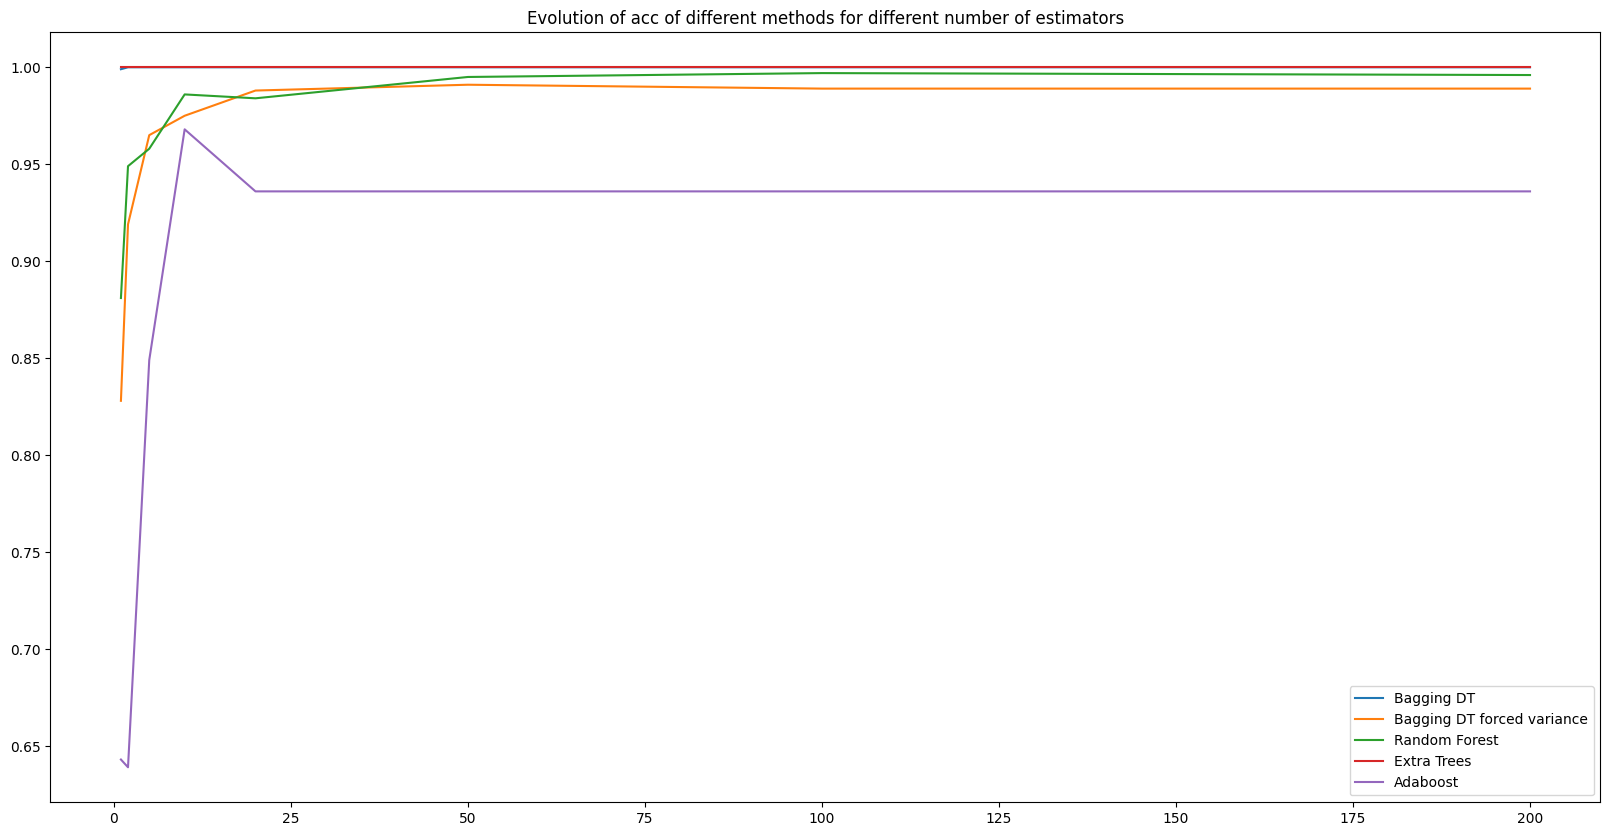

In [183]:
plt.figure(figsize = (20, 10))
plt.title("Evolution of acc of different methods for different number of estimators")
plt.plot([1,2,5,10,20,50,100,200],lb,label = "Bagging DT")
plt.plot([1,2,5,10,20,50,100,200],lb2,label = "Bagging DT forced variance")
plt.plot([1,2,5,10,20,50,100,200],lrf,label = "Random Forest")
plt.plot([1,2,5,10,20,50,100,200],lext,label = "Extra Trees")
# The plot has been updated so it properly shows the AdaBoost accuracy trend
plt.plot([1,2,5,10,20,50,100,200],lboodt,label = "Adaboost")

plt.legend(loc = "lower right")

plt.show()

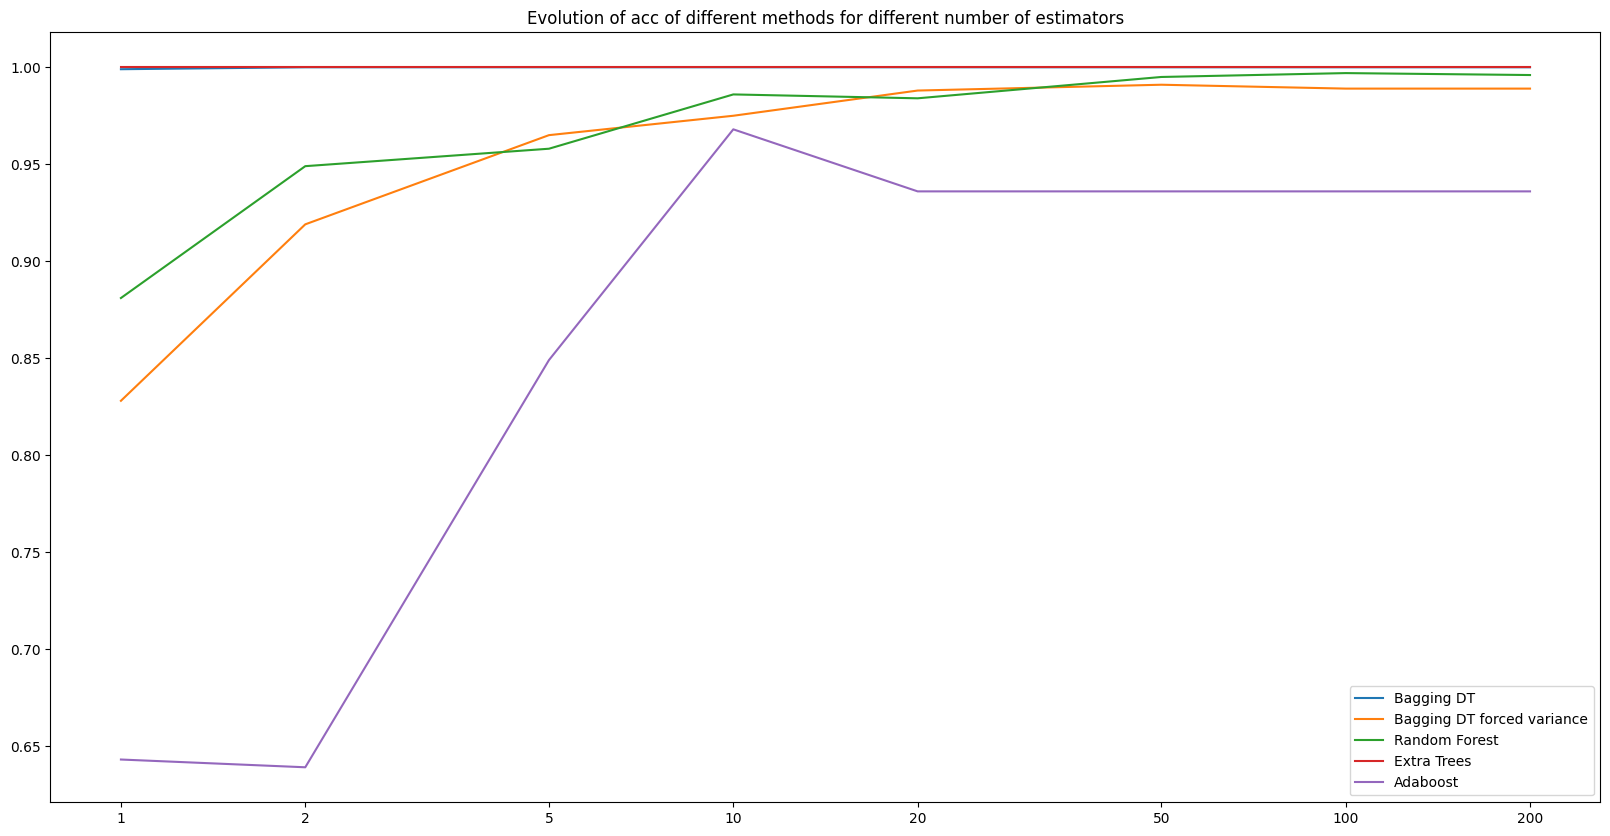

In [184]:
# A LogScale plot has been added as a support for better visualization
x_axis_values = [1, 2, 5, 10, 20, 50, 100, 200]

plt.figure(figsize = (20, 10))
plt.title("Evolution of acc of different methods for different number of estimators")
plt.plot([1,2,5,10,20,50,100,200],lb,label = "Bagging DT")
plt.plot([1,2,5,10,20,50,100,200],lb2,label = "Bagging DT forced variance")
plt.plot([1,2,5,10,20,50,100,200],lrf,label = "Random Forest")
plt.plot([1,2,5,10,20,50,100,200],lext,label = "Extra Trees")
# The plot has been updated so it properly shows the AdaBoost accuracy trend
plt.plot([1,2,5,10,20,50,100,200],lboodt,label = "Adaboost")

plt.xscale('log')

plt.gca().set_xticklabels([])

plt.gca().xaxis.set_major_locator(FixedLocator(x_axis_values))
plt.gca().xaxis.set_major_formatter(FixedFormatter([str(x) for x in x_axis_values])) 

plt.gca().xaxis.set_minor_locator(plt.NullLocator())

plt.legend(loc = "lower right")

plt.show()

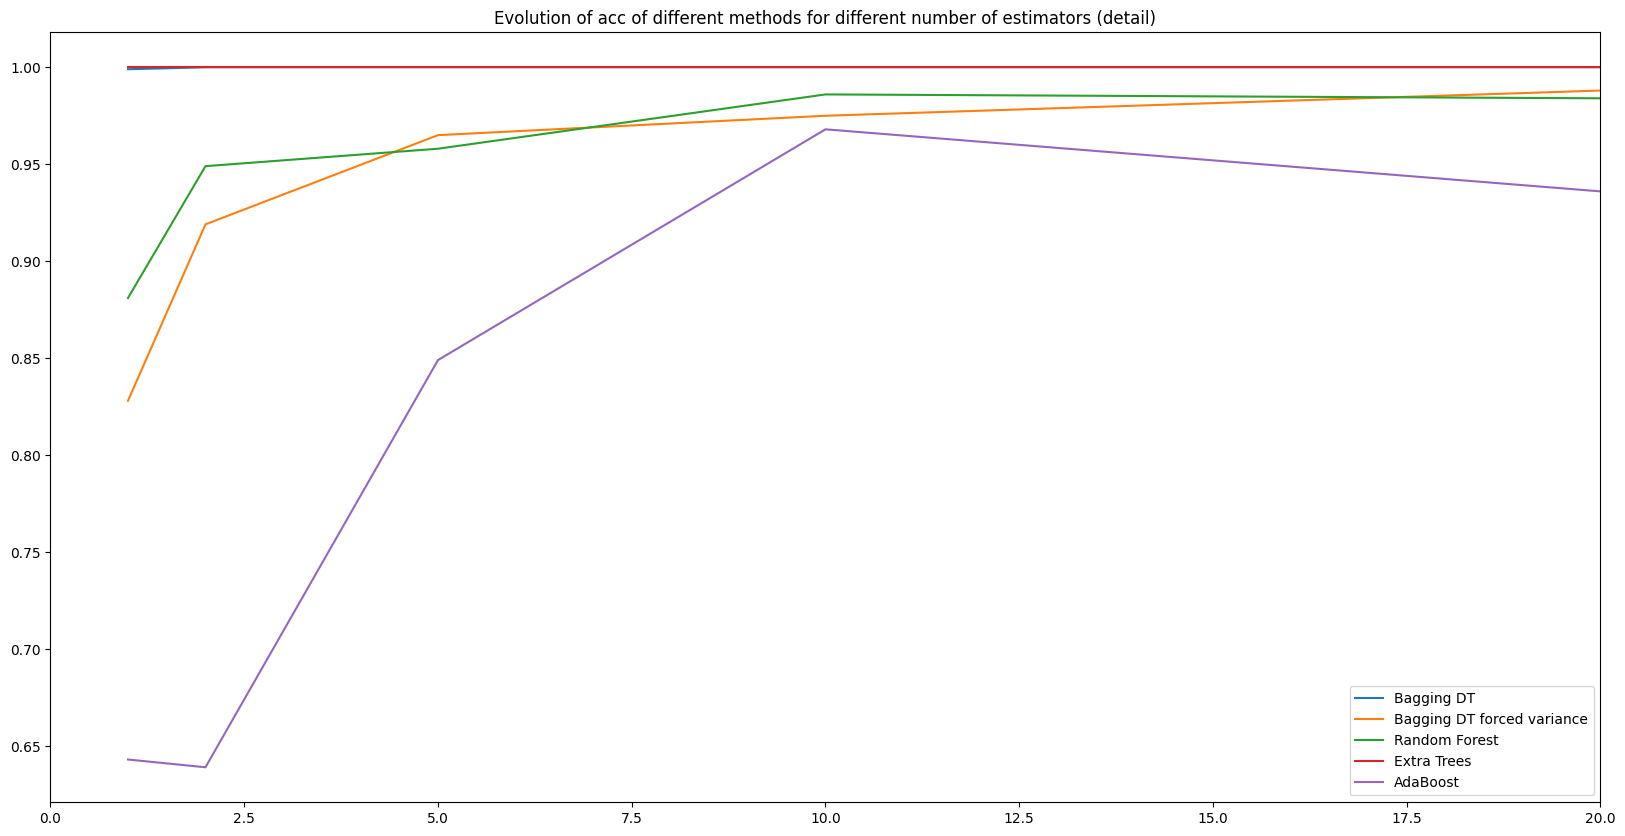

In [186]:
plt.figure(figsize = (20, 10))
plt.title("Evolution of acc of different methods for different number of estimators (detail)")
plt.plot([1,2,5,10,20,50,100,200],lb,label = "Bagging DT")
plt.plot([1,2,5,10,20,50,100,200],lb2,label = "Bagging DT forced variance")
plt.plot([1,2,5,10,20,50,100,200],lrf,label = "Random Forest")
plt.plot([1,2,5,10,20,50,100,200],lext,label = "Extra Trees")
plt.plot([1,2,5,10,20,50,100,200],lboodt,label = "AdaBoost")
plt.legend(loc = "lower right")
plt.xlim(0,20)
plt.show()

Feature selection with Forests of trees

In [172]:
clf = RandomForestClassifier(n_estimators = 50)
clf = clf.fit(X, y)
print(clf.feature_importances_)

[0.00335445 0.         0.04467978 0.0642627  0.03522226 0.02766479
 0.02725876 0.01376301 0.0461405  0.1254728  0.04313814 0.07526383
 0.03140362 0.11083834 0.08989369 0.02061097 0.03273905 0.08474846
 0.03293769 0.02036977 0.01804498 0.0183295  0.03386293]


In [173]:
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(clf, prefit = True, threshold = 0.1)
X_new = model.transform(X)
print(X_new.shape)

print(np.mean(cross_val_score(KNeighborsClassifier(), X = X, y = y, cv = 10, scoring = "accuracy")))
print(np.mean(cross_val_score(KNeighborsClassifier(), X = X_new, y = y, cv = 10, scoring = "accuracy")))

(1000, 2)
0.998
0.873


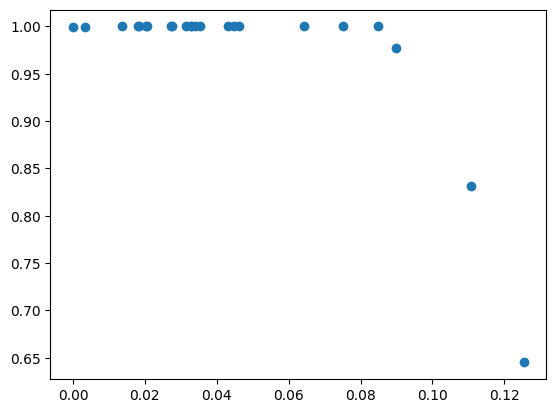

Best threshold: 0.044679780820582736


In [174]:
thresholds = clf.feature_importances_

l=[]
lparval=[]
for threshold in thresholds:
    model = SelectFromModel(
        clf,
        prefit = True,
        threshold = threshold
    )
    X_new = model.transform(X)
    params = {
        "n_neighbors": list(range(1,30,2)),
        "weights": ("distance", "uniform")
    }

    knc = KNeighborsClassifier()
    clf2 = GridSearchCV(
        knc,
        param_grid = params,
        cv = 10,
        n_jobs = -1
    )
    clf2.fit(X, y)
    parval = clf2.best_params_
    clf3 = KNeighborsClassifier(
        n_neighbors = parval["n_neighbors"],
        weights = parval["weights"]
    )
    acc = np.mean(cross_val_score(clf3, X = X_new, y = y, cv = 10, scoring = "accuracy"))
    l.append(acc)
    lparval.append(parval)

plt.scatter(thresholds,l)
plt.show()  

print(f"Best threshold: {thresholds[np.argmax(l)]}")

In [175]:
parval = lparval[np.argmax(l)]
model = SelectFromModel(
    clf,
    prefit = True,
    threshold = thresholds[np.argmax(l)]
)
X_new = model.transform(X)
print(X_new.shape)


print("With FS: ", np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights']), X=X_new, y=y, cv=10, scoring='accuracy')))

(1000, 8)
With FS:  1.0


In [19]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X)

rf_model = RandomForestClassifier(
    n_estimators = 50,
    min_samples_split = 10,
    max_depth=3)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X)


classes = np.unique(y)
results = {}
for cls in classes:
    # Convert to binary labels: One-vs-All
    y_true_binary = (y == cls).astype(int)
    rf_pred_binary = (rf_predictions == cls).astype(int)
    nb_pred_binary = (nb_predictions == cls).astype(int)
    
    # Create contingency table
    contingency_table = [[0, 0], [0, 0]]
    for rf_pred, nb_pred, true_label in zip(rf_pred_binary, nb_pred_binary, y_true_binary):
        if rf_pred == true_label and nb_pred == true_label:
            contingency_table[0][0] += 1  # Both correct
        elif rf_pred == true_label and nb_pred != true_label:
            contingency_table[0][1] += 1  # RF correct, NB incorrect
        elif rf_pred != true_label and nb_pred == true_label:
            contingency_table[1][0] += 1  # RF incorrect, NB correct
        else:
            contingency_table[1][1] += 1  # Both incorrect
    
    # Perform McNemar test
    mcnemar_result = mcnemar(contingency_table, exact=True)
    results[cls] = {
        "contingency_table": contingency_table,
        "p_value": mcnemar_result.pvalue
    }

results

{'High': {'contingency_table': [[920, 80], [0, 0]],
  'p_value': np.float64(1.6543612251060553e-24)},
 'Low': {'contingency_table': [[970, 30], [0, 0]],
  'p_value': np.float64(1.862645149230957e-09)},
 'Medium': {'contingency_table': [[890, 110], [0, 0]],
  'p_value': np.float64(1.5407439555097887e-33)}}